In [4]:
using DelimitedFiles, Plots, Statistics

using CurveFit, LaTeXStrings

Plots.default(
    grid = true,
    size = (400,400),
    fontfamily="serif-roman", 
    labelfontsize=15,
    titlefontsize =12,
    xguidefontsize=15,
    yguidefontsize=15,
    xtickfontsize=12,
    ytickfontsize=12,
    markerstrokewidth = 1
)

# Read runs for one gamma value

TIT = "T=8, λ=1.0, γ=0.014, N=50000"
(nrun, errstd) = (1, 0.01136495201633317)
(nrun, errstd) = (2, 0.0125913854720934)
(nrun, errstd) = (3, 0.011288646999656949)
(nrun, errstd) = (4, 0.01214981122513432)
(nrun, errstd) = (5, 0.011355678568710885)
(nrun, errstd) = (6, 0.010993617654241433)
(nrun, errstd) = (7, 0.012633334454104306)
(nrun, errstd) = (8, 0.011310210020563226)
(nrun, errstd) = (9, 0.010709154679970415)
(nrun, errstd) = (10, 0.011664767358388124)


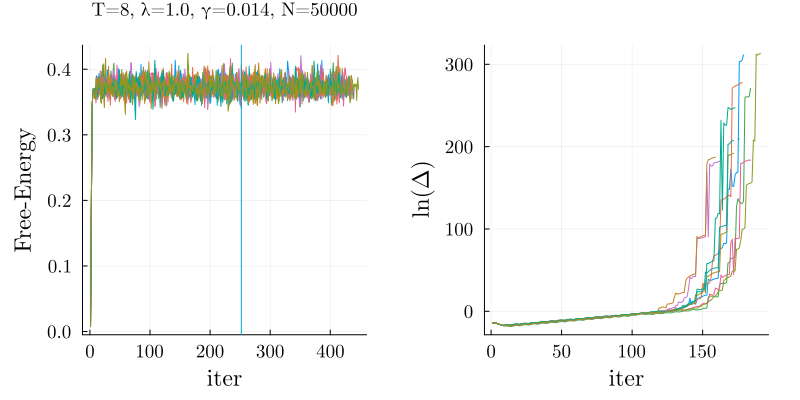

In [36]:
## POPULATION DYNAMICS
# read all runs for 1 gamma value 

path = "data_stab/res_epid_stab/"
nam="fileres_epid_stab"
GAM=0.014
N=50000
iter=500
extension = "_SIG00.0001_run"

T=8
LAM=1.0
halfiter=Int64(iter/2)+2
numruns = 1:10

TIT = "T="*string(T)*", λ="*string(LAM)*", γ="*string(GAM)*", N="*string(N)
@show TIT
foldergam="gam"*string(GAM)*"/"
nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
pconv=plot(xaxis="iter", yaxis="Free-Energy", title=TIT);
pd1 = plot(xaxis="iter", yaxis="ln(Δ)");

for nrun in numruns
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
    iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
    iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
    iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
    log_Δ = log.(res[iter_Δ,3])
    errstd = std(res[iter_full[100:end],2])
    @show nrun, errstd
    if errstd < 0.1
        plot!(pconv,res[iter_full,2], label="")
        plot!(pd1, log_Δ, label="")
    end
end
vline!(pconv, [halfiter], label="")
pγ= plot(pconv, pd1, size=(800,400), layout=(1,2), margin=6*Plots.mm)

sfitΔ = 0.9046249168191032


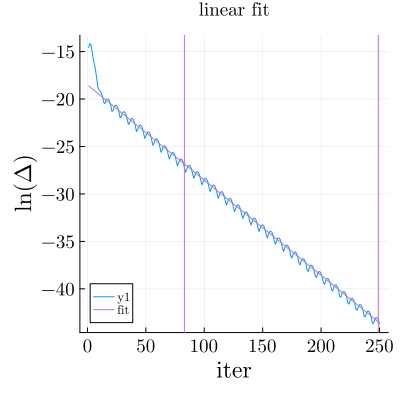

In [23]:
nrun = 3
namefile = path*foldergam*nam*nameparams*extension*string(nrun)
file = readdlm(namefile);
res = file[4:end,1:3]
iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
log_Δ = log.(res[iter_Δ,3])

pΔ = plot(xaxis="iter", yaxis="ln(Δ)", title="linear fit");
plot!(pΔ, log_Δ)
frac_cut = 3
lsta = Int64(round(length(iter_Δ)/frac_cut))
lend = length(iter_Δ)-1#-lsta
log_Δ_cut = log_Δ[lsta:lend]
(a,b)=linear_fit(lsta:lend, log_Δ_cut)
sfitΔ = exp(b)
@show sfitΔ
lmid=Int64(round((lsta+lend)/2))
diff_fit = b*lmid - log_Δ[lmid]  
vline!(pΔ, [lsta], color=4, label="")
vline!(pΔ, [lend], color=4, label="")    
plot!(pΔ, b.*(1:length(iter_Δ)).-diff_fit, label="fit")

plot(pΔ)

TIT = "T=8, λ=1.0, γ=0.00595, N=1000000"
(nrun, errstd) = (1, 0.00018185840294190472)
(nrun, errstd) = (2, 0.0029006793945592505)
(nrun, errstd) = (3, 0.005902222398065281)
(nrun, errstd) = (4, 0.00021210536381975885)
(nrun, errstd) = (5, 0.0005322688072011434)
(nrun, errstd) = (6, 0.0018541004999246635)
(nrun, errstd) = (7, 0.00017455844360473628)
(nrun, errstd) = (8, 0.0034802087297743944)
(nrun, errstd) = (9, 0.0003712505506085248)
(nrun, errstd) = (10, 0.0037072673315467104)


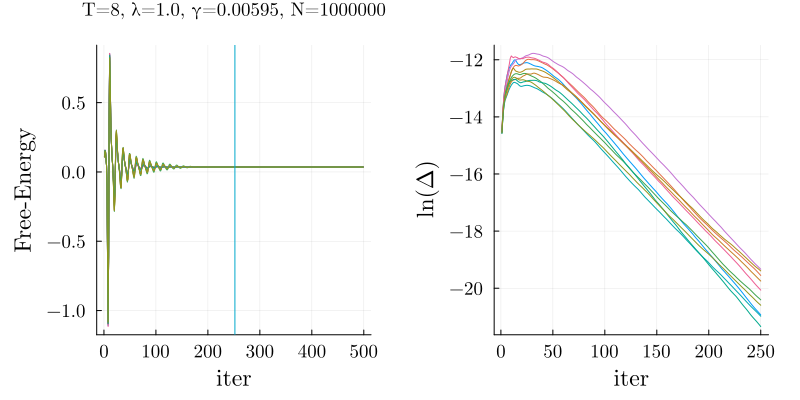

In [93]:
## BP ON 1 GRAPH INSTANCE

path = "data_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"
GAM=0.00595
N=1000000
iter=500
extension = "_SIG00.000001_fixseeds1_run"

T=8
LAM=1.0
halfiter=Int64(iter/2)+2
numruns = 1:10

TIT = "T="*string(T)*", λ="*string(LAM)*", γ="*string(GAM)*", N="*string(N)
@show TIT
foldergam="gam"*string(GAM)*"/"
nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
pconv=plot(xaxis="iter", yaxis="Free-Energy", title=TIT);
pd1 = plot(xaxis="iter", yaxis="ln(Δ)");

for nrun in numruns
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
    iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
    iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
    iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
    log_Δ = log.(res[iter_Δ,3])
    errstd = std(res[iter_full[100:end],2])
    @show nrun, errstd
    if errstd < 0.1
        plot!(pconv,res[iter_full,2], label="")
        plot!(pd1, log_Δ, label="")
    end
end
vline!(pconv, [halfiter], label="")
pγ= plot(pconv, pd1, size=(800,400), layout=(1,2), margin=6*Plots.mm)

# PLOTS FOR PAPER

In [196]:
# Set params: popdyn - right

path = "data_stab/res_epid_stab/"
nam="fileres_epid_stab"
extension ="_SIG00.0001_run" 
ext_plot_title = "popdyn_right"

T=8
LAM=1.
N=50000
iter=500
halfiter=Int64(iter/2)+2
runs_range=1:10

γ_range = [0.014, 0.01475, 0.015, 0.01525, 0.0155, 0.01575, 0.016, 
    0.01625, 0.0165, 0.017, 0.0175, 0.018] 
γ_range = γ_range[2:end]

11-element Vector{Float64}:
 0.01475
 0.015
 0.01525
 0.0155
 0.01575
 0.016
 0.01625
 0.0165
 0.017
 0.0175
 0.018

In [171]:
# Set params: 1graph - right

path = "data_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"
extension = "_SIG00.000001_run"
ext_plot_title = "graph_right"

T=8
LAM=1.0
N=500000
iter=2000
halfiter=Int64(iter/2)+2
runs_range=1:10

γ_range = [0.01025, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013]

7-element Vector{Float64}:
 0.01025
 0.0105
 0.011
 0.0115
 0.012
 0.0125
 0.013

In [178]:
# Set params: popdyn - left

path = "data_stab/res_epid_stab/"
nam="fileres_epid_stab"
extension = "_SIG00.000001_run"
ext_plot_title = "popdyn_left"

T=8
LAM=1.0
N= 500000
iter=500
halfiter=Int64(iter/2)+2
runs_range=1:10

γ_range = [0.00525, 0.005275, 0.0053, 0.005325, 0.00535, 0.005375, 0.0054, 0.005425]#, 0.00545]

8-element Vector{Float64}:
 0.00525
 0.005275
 0.0053
 0.005325
 0.00535
 0.005375
 0.0054
 0.005425

In [218]:
# Set params: 1graph - left

path = "data_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"
extension = "_SIG00.000001_fixseeds1_run"
ext_plot_title = "graph_left"

T=8
LAM=1.0
N=1000000
iter=500
halfiter=Int64(iter/2)+2
runs_range=1:20

γ_range = [0.0054, 0.0055, 0.0056, 0.0057, 0.00575, 0.0058, 0.00585, 0.0059, 0.005925, 0.00595, 
    0.005975, 0.006, 0.00605]

13-element Vector{Float64}:
 0.0054
 0.0055
 0.0056
 0.0057
 0.00575
 0.0058
 0.00585
 0.0059
 0.005925
 0.00595
 0.005975
 0.006
 0.00605

In [222]:
# Loop on gamma
nb_iter_conv = 400 

gam_res = zeros(length(γ_range), length(runs_range));
std_F_res = zeros(length(γ_range), length(runs_range));
diffmean_F_res = zeros(length(γ_range), length(runs_range));
gam_res .= NaN
std_F_res .= NaN
diffmean_F_res .= NaN
for iγ in 1:length(γ_range)
    GAM=γ_range[iγ]
        
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        foldergam="gam"*string(GAM)*"/"
        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        namefile = path*foldergam*nam*nameparams*extension*string(run)

        file = readdlm(namefile);
        res = file[4:end,1:3]
        iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
        iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
        iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])

        lend_err = iter_full[end]
        if lend_err > nb_iter_conv
            diffmean_F = mean(res[lend_err-nb_iter_conv:lend_err-200,2])-mean(res[lend_err-100:lend_err,2])
            std_F = std(res[end-nb_iter_conv:lend_err,2])
        else
            #@show GAM, lend_err
            diffmean_F = NaN
            std_F = NaN
        end
        
        # linear fit
        frac_cut = 3
        lsta = Int64(round(length(iter_Δ)/frac_cut))
        lend = length(iter_Δ)-1
        if lend-lsta>30 && length(iter_Δ)>0 && abs(std_F) < 0.03
            frac_cut = 3
            log_Δ = log.(res[iter_Δ,3])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            @show GAM, irun, lsta, lend, abs(std_F)
            sfitΔ=NaN
        end
        gam_res[iγ,irun]=sfitΔ
        std_F_res[iγ,irun]=std_F
        diffmean_F_res[iγ,irun]=diffmean_F
    end
end

mean_gam = zeros(length(γ_range))
std_gam = zeros(length(γ_range))

mean_errF = zeros(length(γ_range))
std_errF = zeros(length(γ_range))

mean_diffmean_F = zeros(length(γ_range))
std_diffmean_F = zeros(length(γ_range))

for iγ in 1:length(γ_range)
    indicesgam=.!isnan.(gam_res[iγ,:])    
    
    mean_gam[iγ] = mean(gam_res[iγ,indicesgam])
    std_gam[iγ] = std(gam_res[iγ,indicesgam])

    indicesconv=.!isnan.(diffmean_F_res[iγ,:])    
    @show γ_range[iγ], sum(indicesgam), sum(indicesconv)

    mean_errF[iγ] = mean(std_F_res[iγ,indicesconv])
    std_errF[iγ] = std(std_F_res[iγ,indicesconv])

    mean_diffmean_F[iγ] = mean(diffmean_F_res[iγ,indicesconv])
    std_diffmean_F[iγ] = std(diffmean_F_res[iγ,indicesconv])
   
end

(GAM, irun, lsta, lend, abs(std_F)) = (0.005925, 1, 31, 93, NaN)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005925, 2, 33, 98, NaN)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005925, 4, 39, 115, NaN)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005925, 6, 44, 131, NaN)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005925, 10, 26, 77, NaN)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005975, 3, 33, 98, NaN)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005975, 6, 6, 16, NaN)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005975, 7, 83, 249, 0.08028735450001656)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005975, 9, 64, 191, 0.047275608293249685)
(GAM, irun, lsta, lend, abs(std_F)) = (0.005975, 10, 43, 128, NaN)
(GAM, irun, lsta, lend, abs(std_F)) = (0.006, 5, 83, 249, 0.0694643004888168)
(GAM, irun, lsta, lend, abs(std_F)) = (0.006, 6, 80, 240, 0.137667024448611)
(GAM, irun, lsta, lend, abs(std_F)) = (0.006, 7, 63, 187, 0.05879797651633927)
(GAM, irun, lsta, lend, abs(std_F)) = (0.006, 8, 83, 249, 0.08086721004497628

In [225]:
hcat(γ_range, mean_gam, std_gam, mean_diffmean_F)

13×4 Matrix{Float64}:
 0.0054    0.431555    0.139448    2.9079e-8
 0.0055    0.709351    0.105931    8.55097e-10
 0.0056    0.871143    0.0598426   1.28552e-8
 0.0057    0.92073     0.0238016   2.66611e-8
 0.00575   0.93319     0.018929    1.65488e-8
 0.0058    0.940775    0.00994613  3.0593e-7
 0.00585   0.951754    0.00643056  5.92458e-7
 0.0059    0.959449    0.00367533  2.98564e-5
 0.005925  0.959599    0.00302287  0.000299806
 0.00595   0.961748    0.00288984  0.000288339
 0.005975  0.965724    0.00375073  0.000544842
 0.006     0.966298    0.00399843  0.00046966
 0.00605   0.969822  NaN           0.00242354

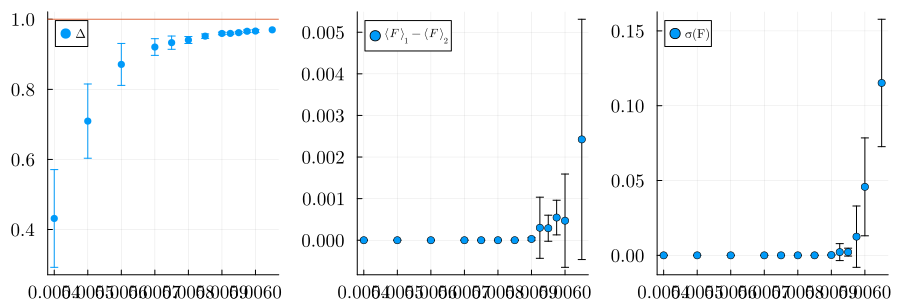

In [226]:
# Plot results

p1 = scatter(γ_range, mean_gam, err=std_gam, markerstrokecolor=:auto, markerstrokewidth=1, label="Δ")
hline!(p1, [1], label="")
p2 = scatter(γ_range, mean_diffmean_F, err=std_diffmean_F, label=L"\langle F \ \rangle_1 - \langle F \ \rangle_2")
p3 = scatter(γ_range, mean_errF, err=std_errF, label="σ(F)")
plot(p1, p2, p3, layout=(1,3), size=(900, 300))


In [227]:
# Fit:

# Fit: popdyn - right
pts_fit= 1:length(γ_range)

# Fit: popdyn - left
#pts_fit= 1:length(γ_range)

# Fit: 1graph - right
#pts_fit= 1:length(γ_range)

# Fit: 1graph - left
pts_fit= 7:length(γ_range)-2



7:11

solm = 0.006311398097918003


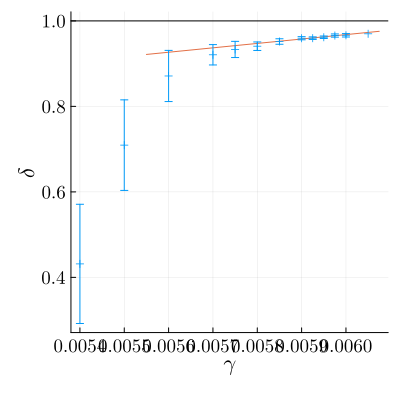

In [228]:
#LINEAR FIT (FOR FINITE-SIZE INSTANCES)

(a0,a1)=linear_fit(γ_range[pts_fit], mean_gam[pts_fit])
solm = (1-a0)/a1
@show solm

fit_range_plot= (γ_range[pts_fit[1]]-0.0003):0.000001:(γ_range[pts_fit[end]]+0.0001)
pγ = plot(xlabel=L"\gamma", ylabel=L"\delta")
plot!(pγ, fit_range_plot, a1.*fit_range_plot .+ a0, 
    label="", linewidth=1, color=2)
scatter!(γ_range, mean_gam, err=std_gam, 
    label="", markershape=:cross, markerstrokecolor=:1, markerstrokewidth=1, color=1)
hline!(pγ, [1], label="", color="black")


(a0, a1, a2, discrim) = (4.749610604918585, -368.7177414506635, 8024.119853012828, 15603.473276499688)
(solm, solp) = (0.015191938959583182, 0.030759236771200613)


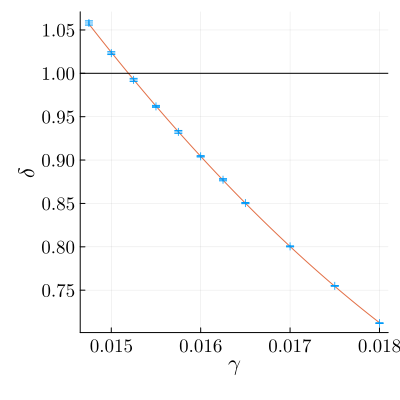

In [201]:
# QUADRATIC FIT (FOR POPULATION DYNAMICS)

(a0,a1,a2)=poly_fit(γ_range[pts_fit], mean_gam[pts_fit], 2)
discrim=a1^2-4*a2*(a0-1)
@show a0, a1, a2, discrim
if discrim>=0
    solm, solp = (-a1-sqrt(discrim))/(2*a2), (-a1+sqrt(discrim))/(2*a2)
    @show solm, solp
end
fit_range_plot= (γ_range[1]):0.000001:(γ_range[end])

pγ = plot(xlabel=L"\gamma", ylabel=L"\delta", dpi=500)

#vspan!(pγ,[solp,γ_range[end]+0.00002], color=:blues, label="", fc=:blues)
#vspan!(pγ,[γ_range[1]-0.0001,solm], color=:blues, label="", fc=:blues)

plot!(pγ, fit_range_plot, a2.*fit_range_plot.*fit_range_plot .+ a1.*fit_range_plot .+ a0, 
    label="", linewidth=1, color=2)
scatter!(γ_range, mean_gam, err=std_gam, 
    label="", markershape=:cross, markerstrokecolor=:1, markerstrokewidth=1, color=1)
hline!(pγ, [1], label="", color="black")


In [191]:
savefig(pγ, "stav_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".png")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/stav_crit_graph_left_T8_λ1.0_N1000000.png"

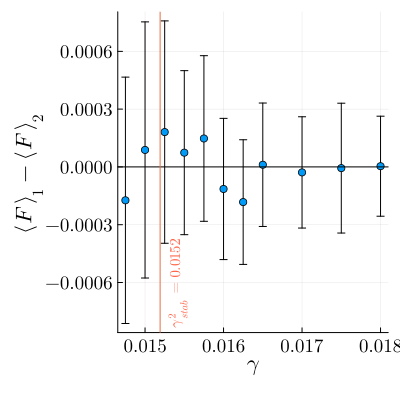

In [202]:
pconv = plot(xlabel=L"γ", ylabel=L"\langle F \ \rangle_1 - \langle F \ \rangle_2")
scatter!(pconv, γ_range, mean_diffmean_F, err=std_diffmean_F, label="")
hline!(pconv, [0], label="", color="black")
vline!(pconv, [solm], label="", color=2)
annotate!(pconv, 0.01542,-0.0006, text(L"\gamma_{\rm stab}^2=0.0152", :tomato, 10, rotation=90))

In [203]:
savefig(pconv, "conv_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/conv_crit_popdyn_right_T8_λ1.0_N50000.pdf"

# # For 1 graph, left

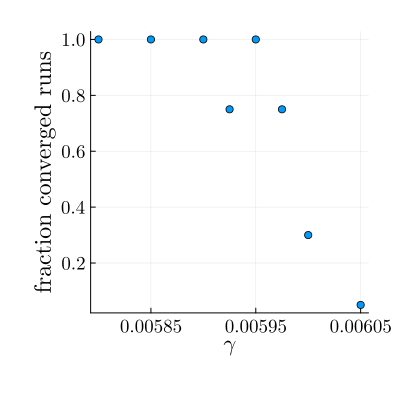

In [229]:
pt_plotconv = 6:length(γ_range)
frac_conv = [sum(std_F_res[i,:] .< 0.03) for i in pt_plotconv]./length(runs_range)
pfrac_conv = plot(xlabel=L"\gamma", ylabel="fraction converged runs", xticks=0.00585:0.0001:0.00605, margin=6*Plots.mm)
scatter!(γ_range[pt_plotconv], frac_conv, label="")#, markershape=:cross, markerstrokecolor=:1, markerstrokewidth=1, color=1)


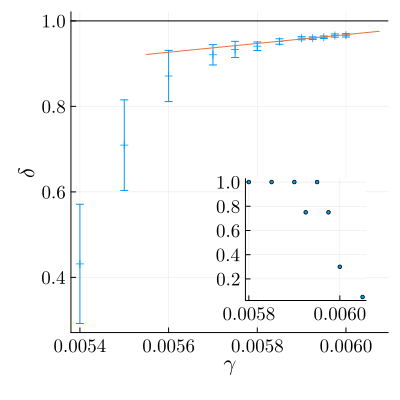

In [230]:
pγ_inset = plot(xlabel=L"\gamma", ylabel=L"\delta", xticks=0.0054:0.0002:0.006)
scatter!(pγ_inset, γ_range[1:end-1], mean_gam[1:end-1], err=std_gam, 
    label="", markershape=:cross, markerstrokecolor=:1, markerstrokewidth=1, color=1)
hline!(pγ_inset, [1], label="", color="black")
plot!(pγ_inset, fit_range_plot, a1.*fit_range_plot .+ a0, 
    label="", linewidth=1, color=2)

scatter!(pγ_inset, γ_range[pt_plotconv], frac_conv, label= "", #L"f_c",
    inset = (1, bbox(0.55,0.1,0.38,0.38,:bottom)), subplot = 2, 
    xticks=0.0058:0.0002:0.0060, markersize=2, legend=:topright)


In [231]:
savefig(pγ_inset, "stav_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/stav_crit_graph_left_T8_λ1.0_N1000000.pdf"

# # read single run free-energy

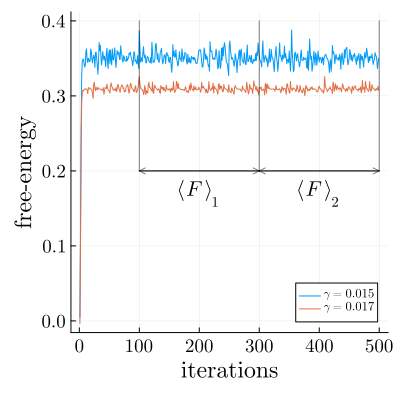

In [233]:

path = "data_stab/res_epid_stab/"
nam="fileres_epid_stab"
#path = "tmp_stab/res_epid_1graph_stab/"
#nam="fileres_epid_1graph_stab"

extension ="_SIG00.0001_run" 
#extension ="_run"  

T=8
LAM=1.0
N=50000
iter=500

pF=plot(xaxis="iterations", yaxis="free-energy");

nrun = 1
for GAM in [0.015, 0.017]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
    plot!(pF,res[iter_full,2], label=L"γ="*string(GAM) )
end
plot!(pF, [100,100], [0.2,0.4], label="", alpha=0.5, color="black")
plot!(pF, [300,300], [0.2,0.4], label="", alpha=0.5, color="black")
plot!(pF, [500,500], [0.2,0.4], label="", alpha=0.5, color="black")
plot!(pF, [100,300],[0.2,0.2], arrow=:both, label="", alpha=0.5, color="black")
plot!(pF, [300,500],[0.2,0.2], arrow=:both, label="", alpha=0.5, color="black")
annotate!(pF, 200, 0.17, L"\langle F \ \rangle_1")
annotate!(pF, 400, 0.17, L"\langle F \ \rangle_2")
pF

In [234]:
savefig(pF, "free_energy_fluctuations_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/free_energy_fluctuations_T8_λ1.0_N50000.pdf"

# # read single run stability parameter - with pop dyn

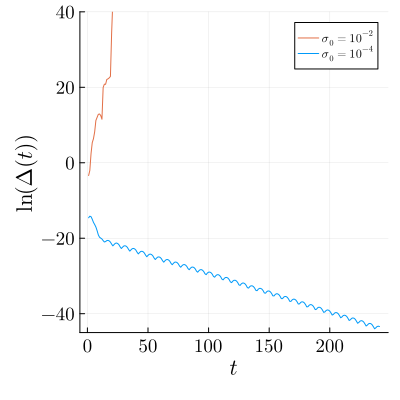

In [236]:

path = "data_stab/res_epid_stab/"
nam="fileres_epid_stab"


T=8
LAM=1.0
GAM=0.016
iter=500
N= 50000

exts = ["_run", "_SIG00.0001_run"] 
labels = [L"\sigma_0=10^{-2}", L"\sigma_0=10^{-4}"]
colors=[2,1]

pΔ=plot(xaxis=L"t", yaxis=L"\ln(\Delta(t))", ylims=(-45,40));

nrun = 1
for i in 1:2
    extension = exts[i]
    lab = labels[i]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=10:sum(typeof.(res[:,2]).!=SubString{String})
    iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
    iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
    log_Δ = log.(res[iter_Δ,3])
    plot!(pΔ, log_Δ, label=lab, color=colors[i])
end
pΔ


In [237]:
savefig(pΔ, "ΔversusIter_T"*string(T)*"_λ"*string(LAM)*"_γ"*string(GAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/ΔversusIter_T8_λ1.0_γ0.016_N50000.pdf"

# # read single run free-energy - on one graph

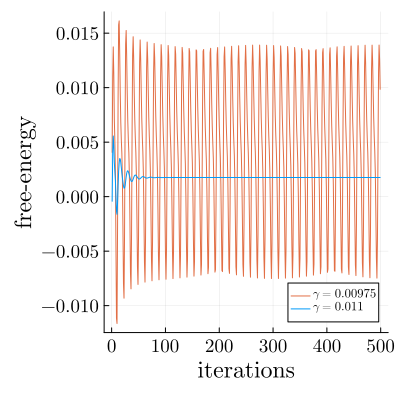

In [241]:

path = "data_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"

extension ="_SIG00.000001_run" 
#extension ="_run"  

T=8
LAM=1.0
N=500000
iter=500

pF=plot(xaxis="iterations", yaxis="free-energy");
gamvals = [0.00975, 0.011]
colors = [2,1]
nrun = 1

for i in 1:2
    GAM=gamvals[i]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
    plot!(pF,res[iter_full,2], label=L"γ="*string(GAM), color=colors[i])
end
pF

In [242]:
savefig(pF, "free_energy_fluctuations_onegraph_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/free_energy_fluctuations_onegraph_T8_λ1.0_N500000.pdf"

# # read single run stability parameter - on one graph

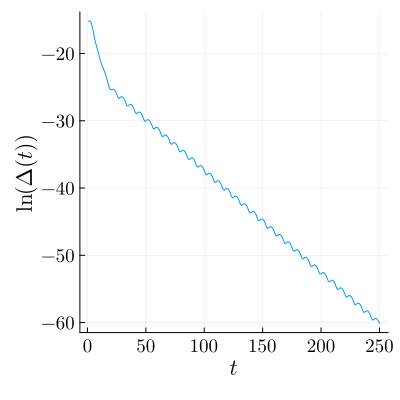

In [244]:

path = "data_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"


T=8
LAM=1.0
GAM=0.012
iter=2000
N= 500000
extension = "_SIG00.000001_run"
lab= ""

pΔ=plot(xaxis=L"t", yaxis=L"\ln(\Delta(t))");

nrun = 1

foldergam="gam"*string(GAM)*"/"
nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
namefile = path*foldergam*nam*nameparams*extension*string(nrun)
file = readdlm(namefile);
res = file[4:end,1:3]
iter_full=10:sum(typeof.(res[:,2]).!=SubString{String})
iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
log_Δ = log.(res[iter_Δ,3])
plot!(pΔ, log_Δ[1:250], label=lab)
pΔ


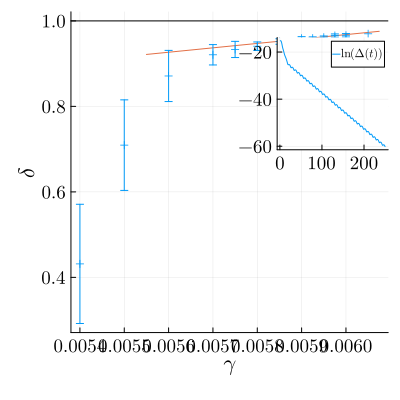

In [245]:
pΔinset=plot(pγ)
plot!(pΔinset, log_Δ[1:250], label=L"\ln(\Delta(t))",
    inset = (1, bbox(0.65,0.08,0.35,0.35,:left)), subplot = 2,
    xticks=0:100:200, yticks=0:-20:-60)

In [246]:
savefig(pΔinset, "stav_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/stav_crit_graph_left_T8_λ1.0_N500000.pdf"

# # read single run stability parameter - with pop dyn

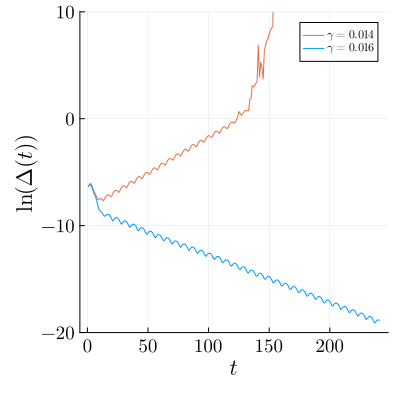

In [248]:

path = "data_stab/res_epid_stab/"
nam="fileres_epid_stab"


T=8
LAM=1.0
gams=[0.014, 0.016]
iter=500
N= 50000

extension = "_SIG00.0001_run"
labels = [L"\gamma=0.014", L"\gamma=0.016"]
colors=[2,1]

pΔ=plot(xaxis=L"t", yaxis=L"\ln(\Delta(t))", ylims=(-20,10));

nrun = 1
for i in 1:2
    GAM = gams[i]
    lab = labels[i]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=10:sum(typeof.(res[:,2]).!=SubString{String})
    iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
    iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
    log_Δ = log.(res[iter_Δ,3])
    plot!(pΔ, log_Δ./log(10), label=lab, color=colors[i])
end
pΔ


In [249]:
savefig(pΔ, "ΔversusIter_T"*string(T)*"_λ"*string(LAM)*"_SIG00.0001_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/ΔversusIter_T8_λ1.0_SIG00.0001_N50000.pdf"